<a href="https://colab.research.google.com/github/M-o-ha-med/ProyekMLT2/blob/main/ProyekML_TERAPAN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir Kelas Machine Learning Terapan - Mohamed

## Menginstall library LightFM untuk membuat model sistem rekomendasi

## Memanggil library yang dibutuhkan

In [59]:
!pip install lightfm

In [60]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Data Loading

In [61]:
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print(path)

/kaggle/input/book-recommendation-dataset


In [62]:
data_path = os.listdir(path)

print(data_path)

['Ratings.csv', 'Users.csv', 'classicRec.png', 'Books.csv', 'DeepRec.png', 'recsys_taxonomy2.png']


In [63]:
ratings_df = pd.read_csv(f'/{path}/{data_path[0]}')
books_df = pd.read_csv(f'/{path}/{data_path[3]}')
users_df = pd.read_csv(f'/{path}/{data_path[1]}')

<ipython-input-63-99197fb4c75e>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(f'/{path}/{data_path[3]}')


Terdapa tiga file dataset yang akan digunakan, yaitu :


1.   Ratings.csv
2.   Users.csv
3.   Books.csv

Berikutnya akan dilakukan Exploratory Data Analysis (EDA) untuk mengetahui karakteristik dari data.



#Exploratory Data Analysis

## Melihat 5 data teratas dari dataset ratings

In [64]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Tabel diatas merupakan contoh dari bentuk data yang berada di dalam dataset ratings_df.

## Melihat 5 data teratas dari dataset books

In [65]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Tabel diatas merupakan contoh dari bentuk data yang berada di dalam dataset books_df.

## Melihat 5 data teratas dari dataset users

In [66]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Tabel diatas merupakan contoh dari bentuk data yang berada di dalam dataset users_df.

## Membuat fungsi untuk melihat informasi mengenai dataset, statistika deskriptif serta melihat jumlah data null dan jumlah data duplikat.

In [67]:
def get_df_info(df):
  print("-"*50)
  print(df.info())
  print("-"*50)
  print(df.describe(include='all'))
  print("-"*50)
  print(f'Jumlah data null :\n{df.isnull().sum()}')
  print("-"*50)
  print(f'Jumlah data duplikat :{df.duplicated().sum()}')
  print("-"*50)

### Melihat informasi terkait ratings_df beserta statistika deskriptif dan jumlah mssing value dan jumlah data duplikat

In [68]:
get_df_info(ratings_df)


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None
--------------------------------------------------
             User-ID        ISBN   Book-Rating
count   1.149780e+06     1149780  1.149780e+06
unique           NaN      340556           NaN
top              NaN  0971880107           NaN
freq             NaN        2502           NaN
mean    1.403864e+05         NaN  2.866950e+00
std     8.056228e+04         NaN  3.854184e+00
min     2.000000e+00         NaN  0.000000e+00
25%     7.034500e+04         NaN  0.000000e+00
50%     1.410100e+05         NaN  0.000000e+00
75%     2.110280e+05         NaN  7.000000e+0

Tidak ditemukan kolom dengan missing value dan tidak ditemukan data duplikat.

### Melihat informasi terkait books_df beserta statistika deskriptif dan jumlah missing value dan jumlah data duplikat

In [69]:
get_df_info(books_df)

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
--------------------------------------------------
              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358               271360   
unique      271360          242135           102022                  202   
top     020130

Ditemukan 7 missing value pada DataFrame books_df, 2 pada kolom Book-Author , 2 pada kolom Publisher, dan dan 3 pada kolom Image-URL-L.

### Melihat informasi terkait users_df beserta statistika deskriptif dan jumlah mssing value dan jumlah data duplikat

In [70]:
get_df_info(users_df)

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None
--------------------------------------------------
             User-ID                         Location            Age
count   278858.00000                           278858  168096.000000
unique           NaN                            57339            NaN
top              NaN  london, england, united kingdom            NaN
freq             NaN                             2506            NaN
mean    139429.50000                              NaN      34.751434
std      80499.51502                              NaN      14.428097
min          1.00000                  

Ditemukan 110762 missing value pada kolom Age

## Melihat distribusi dari data Age pada dataset users.

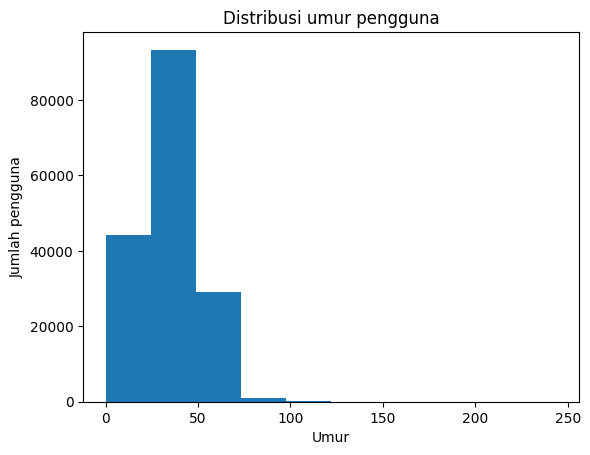

In [71]:
plt.hist(x = users_df['Age'] , bins = 10)
plt.title('Distribusi umur pengguna')
plt.xlabel('Umur')
plt.ylabel('Jumlah pengguna')
plt.show()

In [72]:
users_df['Age'].skew()

np.float64(1.178391610309946)

Distribusi data pada kolom Age cenderung *right skew*, dibuktikan dengan nilai skew sebesar 1.178391610309946

### Melihat distribusi data pada kolom Book-Rating

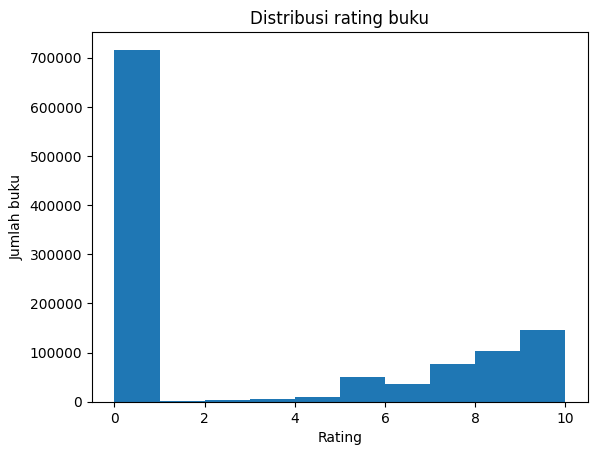

In [73]:
plt.hist(x = ratings_df['Book-Rating'] , bins=10)
plt.title('Distribusi rating buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah buku')
plt.show()

In [74]:
ratings_df['Book-Rating'].skew()

np.float64(0.733641207848559)

Terdapat ketidakseimbangan dalam distribusi nilai , dimana rating 0 berjumlah 700 ribu mendominasi data rating lain. hal tersebut membuat distribusi data menjadi cenderung ke *right skew* dibuktikan dengan nilai skewness sebesar 0.733641207848559, sehingga agar dapat menyeimbangkan nilainya data dari rating 0 perlu dihapus.

### Melihat 5 tahun dengan jumlah publikasi terbanyak

In [75]:
books_df['Year-Of-Publication'].value_counts().head()

,count
Year-Of-Publication,
2002,13903
2001,13715
1999,13414
2000,13373
1998,12116


Tahun 2002 menjadi tahun dimana banyak buku yang dipublikasikan , dibuktikan dengan jumlah publikasi terbanyak pada angka 919 buku, disusul dengan tahun 2001  dengan buku yang dipublikasikan sebanyak 8115 buku, tahun 2000 dengan buku yang dipublikasikan sebanyak 787 buku, tahun 2003  dengan buku yang dipublikasikan sebanyak 731, dan tahun 1999 dengan buku yang dipublikasikan sebanyak	728 buku.



### Melihat 5 penerbit dengan jumlah terbitan terbanyak

In [76]:
books_df['Publisher'].value_counts().head()

,count
Publisher,
Harlequin,7535
Silhouette,4220
Pocket,3905
Ballantine Books,3783
Bantam Books,3646


Ballantine Books merupakan Publisher urutan teratas dalam hal penerbitan buku, terdapat 300 buku yang telah diterbitkan olehnya, di bawahnya adalah Pocket dengan 255 buku yang diterbitkan, dibawahnya lagi ada Berkley Publishing Group dengan 232 buku yang diterbitkan, dibawahnya lagi ada Warner Books dengan 203 buku yang diterbitkan, dan dibawahnya lagi ada Bantams Books dengan 202 buku yang diterbitkan.


### Hasil Akhir


1.   Pada file ratings.csv, terdapat total 1149780 baris data dengan 3 kolom data, tidak terdapat missing value dan tidak memiliki data duplikat sehingga tidak dibutuhkan tindakan imputasi nilai maupun penghapusan nilai duplikat.

2.   Pada file books.csv, terdapat total 271360 baris data dengan 8 kolom data, tidak terdapat missing value namun terdapat 7 data duplikat sehingga perlu untuk menghapus data duplikat tersebut.

3.  Pada file users.csv, terdapat total 278858 baris data dengan 3 kolom data, terdapat 110762 missing value pada kolom age namun tidak memiliki data duplikat sehingga diperlukan imputasi data terhadap kolom age menggunakan nilai median dari kolom age dikarenakan distribusi data dari kolom age yang cenderung *right skew* dibuktikan dengan nilai *skewness* sebesar 1.17 yang menandakan bahwa distribusi data cenderung mengalami *skewness*

4. Tahun 2002 menjadi tahun dimana banyak buku yang dipublikasikan , dibuktikan dengan jumlah publikasi terbanyak pada angka 919 buku, disusul dengan tahun 2001  dengan buku yang dipublikasikan sebanyak 8115 buku, tahun 2000 dengan buku yang dipublikasikan sebanyak 787 buku, tahun 2003  dengan buku yang dipublikasikan sebanyak 731, dan tahun 1999 dengan buku yang dipublikasikan sebanyak	728 buku.

5. Ballantine Books merupakan Publisher urutan teratas dalam hal penerbitan buku, terdapat 300 buku yang telah diterbitkan olehnya, di bawahnya adalah Pocket dengan 255 buku yang diterbitkan, dibawahnya lagi ada Berkley Publishing Group dengan 232 buku yang diterbitkan, dibawahnya lagi ada Warner Books dengan 203 buku yang diterbitkan, dan dibawahnya lagi ada Bantams Books dengan 202 buku yang diterbitkan.




## Data Preparation

### Menghapus data anomali pada kolom Year-of-Publication dalam DataFrame books_df berupa tahun ke-0

In [77]:
books_df = books_df[books_df['Year-Of-Publication'] != 0]

Berhasil menghapus data anomali berupa tahun ke 0 dari DataFrame books_df pada kolom Year-Of-Publication

### Melakukan imputasi data pada kolom Age dengan nilai median

In [78]:
users_df.fillna(users_df['Age'].median() , inplace=True)

Imputasi data pada kolom age menggunakan nilai median dilakukan dikarenakan distribusi data dari kolom age yang cenderung *right skew*

### Menghapus nilai duplikat dari DataFrame books_df

In [79]:
books_df.drop_duplicates(inplace=True)

Penghapusan dari nilai duplikat dalam DataFrame books_df dilakukan dikarenakan jumlah data duplikat yang sedikit dan tidak berpengaruh secara signifikan bilamana dihapus serta membuat data menjadi lebih bersih dan siap untuk dijadikan data latih untuk model.

### Menghapus kolom yang tidak diperlukan pada DataFrame books_df

In [80]:
books_df.drop(['Image-URL-S' , 'Image-URL-M' , 'Image-URL-L'], inplace=True , axis=1)

Penghapusan kolom 'Image-URL-S' , 'Image-URL-M' , 'Image-URL-L' dilakukan dikarenakan ketiga kolom tersebut tidak dibutuhkan dan tidak digunakan dalam melatih model.

### Menyaring data dari kolom Book-Rating

In [81]:
ratings_df = ratings_df[ratings_df['Book-Rating'] >= 1]

Menyaring data dari DataFrame ratings_df pada kolom Book-Rating untuk mengambil rating sama dengan atau lebih dari 1 untuk menghindari noise pada data latih dan menghindari distorsi pada model.

### Melakukan sampling data sebanyak 10001 untuk masing-masing DataFame

In [82]:
users_df = users_df[:10001]
books_df = books_df[:10001]
ratings_df = ratings_df[:10001]

Pembatasan data hingga 10001 pada setiap DataFrame dilakukan untuk mempercepat proses pelatihan model  serta menghemat sumber daya.

### Merging DataFrame ratings_df , users_df , dan books_df

In [83]:
merged_df = pd.merge(ratings_df , users_df , on='User-ID')
merged_df = pd.merge(merged_df , books_df , on='ISBN')

merged_df.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,0002005018,5,"timmins, ontario, canada",32.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,8,074322678X,5,"timmins, ontario, canada",32.0,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner
2,8,0887841740,5,"timmins, ontario, canada",32.0,The Middle Stories,Sheila Heti,2004,House of Anansi Press
3,8,1552041778,5,"timmins, ontario, canada",32.0,Jane Doe,R. J. Kaiser,1999,Mira Books
4,8,1567407781,6,"timmins, ontario, canada",32.0,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade


Merge data ini dilakukan biar semua info penting—rating, data user, dan detail buku—nyatu di satu DataFrame. Jadi, model bisa belajar pola dari hubungan antar user dan buku secara lebih lengkap, cocok buat sistem rekomendasi, baik collaborative maupun content-based.

### Melakukan proses encoding menggunakan OneHotEncoder() pada DataFrame merged_df pada kolom [ 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']

In [84]:
items_df = merged_df[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
encoder = OneHotEncoder()
encoded_df = encoder.fit_transform(items_df)

Proses encoding data pada merged_df dilakukan agar dapat memudahkan model dalam menemukan pola tersembunyi pada data serta mempercepat konvergensi model

### Menyiapkan data latih untuk model sistem rekomendasi dengan teknik Collaborative Filtering

In [85]:
dataset1 = Dataset()
dataset1.fit(merged_df['User-ID'] , merged_df['ISBN'])

(interactions_1, weights_1) = dataset1.build_interactions([(row['User-ID'], row['ISBN'], row['Book-Rating']) for _, row in merged_df.iterrows()])

fitting pada dataset1 menggunakan data pada kolom User-ID dan ISBN dilakukan untuk membuat dataset yang nantinya akan digunakan dalam proses pelatihan pada model sistem rekomendasi collaborative filtering

### Menyiapkan data latih untuk model sistem rekomendasi dengan teknik Content-Based Filtering

In [86]:
item_features_list = [
    (row['ISBN'],[row['Book-Title'] , row['Book-Author'], row['Year-Of-Publication'], row['Publisher']])
    for _, row in merged_df.iterrows()
]

dataset2 = Dataset()
all_features = pd.unique(
    merged_df[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
    .values
    .ravel()
)
dataset2.fit(merged_df['User-ID'] , merged_df['ISBN'])
dataset2.fit_partial(items=merged_df['ISBN'] , item_features =  all_features)

item_features = dataset2.build_item_features(item_features_list)

(interactions_2, weights_2) = dataset2.build_interactions([(row['User-ID'], row['ISBN'], row['Book-Rating']) for _, row in merged_df.iterrows()])



fitting pada dataset2 menggunakan data pada kolom User-ID dan ISBN dan fit_partial pada dataset2 menggunakan data buku melalui perantara kolom ISBN dilakukan untuk membuat dataset yang nantinya akan digunakan dalam proses pelatihan pada model sistem rekomendasi content-based filtering

### Hasil Akhir

1.   Berhasil menghapus data anomali berupa tahun ke 0 dari DataFrame books_df pada kolom Year-Of-Publication
2.  Imputasi data pada kolom age menggunakan nilai median dilakukan dikarenakan distribusi data dari kolom age yang cenderung *right skew*
3. Penghapusan dari nilai duplikat dalam DataFrame books_df dilakukan dikarenakan jumlah data duplikat yang sedikit dan tidak berpengaruh secara signifikan bilamana dihapus serta membuat data menjadi lebih bersih dan siap untuk dijadikan data latih untuk model.
4. Penghapusan kolom 'Image-URL-S' , 'Image-URL-M' , 'Image-URL-L' dilakukan dikarenakan ketiga kolom tersebut tidak dibutuhkan dan tidak digunakan dalam melatih model.
5. Menyaring data dari DataFrame ratings_df pada kolom Book-Rating untuk mengambil rating sama dengan atau lebih dari 1 untuk menghindari noise pada data latih dan menghindari distorsi pada model.
6. Pembatasan data hingga 10001 pada setiap DataFrame dilakukan untuk mempercepat proses pelatihan model  serta menghemat sumber daya.
7. Merge data ini dilakukan biar semua info penting—rating, data user, dan detail buku—nyatu di satu DataFrame. Jadi, model bisa belajar pola dari hubungan antar user dan buku secara lebih lengkap, cocok buat sistem rekomendasi, baik collaborative maupun content-based.
8. Proses encoding data pada merged_df dilakukan agar dapat memudahkan model dalam menemukan pola tersembunyi pada data serta mempercepat konvergensi model
9. fitting pada dataset1 menggunakan data pada kolom User-ID dan ISBN dilakukan untuk membuat dataset yang nantinya akan digunakan dalam proses pelatihan pada model sistem rekomendasi collaborative filtering
10. fitting pada dataset2 menggunakan data pada kolom User-ID dan ISBN dan fit_partial pada dataset2 menggunakan data buku melalui perantara kolom ISBN dilakukan untuk membuat dataset yang nantinya akan digunakan dalam proses pelatihan pada model sistem rekomendasi content-based filtering


## Modeling

### Melatih model sistem rekomendasi dengna teknik Collaborative Filtering

In [87]:
model1 = LightFM(loss='warp-kos')
%time model1.fit(interactions_1, epochs=150 , num_threads=4)


CPU times: user 1.28 s, sys: 11.5 ms, total: 1.3 s
Wall time: 738 ms


Model dilatih dengan menggunakan dataset interactions_1 dengan 150 epochs

### Melatih model sistem rekomendasi dengna teknik Content-Based Filtering

In [88]:
model2 = LightFM(loss='warp-kos')
%time model2.fit(interactions_2, epochs=150 , num_threads=4, item_features=encoded_df)

CPU times: user 1.94 s, sys: 15.7 ms, total: 1.96 s
Wall time: 1.1 s


Model dilatih dengan menggunakan dataset interactions_2 dengan 150 epochs dengan tambahan item_features untuk melatih model sistem rekomendasi dengan teknik Content-Based Filtering

### Membuat fungsi untuk melakukan prediksi dan memberikan sistem rekomendasi

In [89]:
def get_prediction(dataset , interactions, model , user_id):
  user_id_map, user_feature_map, item_id_map, item_feature_map = dataset.mapping()

  user_internal_id = user_id in user_id_map
  if not user_internal_id:
    print(user_id_map)
    print("User tidak ditemukan")
    return


  n_items = interactions.shape[1]
  scores = model.predict(user_internal_id, np.arange(n_items))

  # Recommend top 5 items
  top_items = np.argsort(-scores)[:5]

  # Get ISBNs back from internal IDs
  reverse_item_map = {v: k for k, v in item_id_map.items()}
  recommended_isbns = [reverse_item_map[item_id] for item_id in top_items]


  books_data = books_df[books_df['ISBN'].isin(recommended_isbns)]
  return books_data

fungsi ini dibuat untuk melakukan prediksi menggunakan model untuk seorang pelanggan menggunakan user_id

### Melakukan prediksi menggunakan model sistem rekomendasi dengan teknik collaborative filtering dengan user_id = 730

In [106]:
get_prediction(dataset1, interactions_1 , model1 , 730 )

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
19,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
67,0804106304,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12)
1051,0671510053,SHIPPING NEWS,Annie Proulx,1994,Scribner
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
4430,0375727345,House of Sand and Fog,Andre Dubus III,2000,Vintage Books


### Melakukan prediksi menggunakan model sistem rekomendasi dengan teknik content-based filtering dengan user_id = 730

In [107]:
get_prediction(dataset2, interactions_2 , model2 , 730)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
1201,0743457943,Trading Places,Fern Michaels,2003,Pocket Star
2955,0425144569,For All Eternity,Linda Lael Miller,1994,Berkley Publishing Group
5697,0812550897,The Wandering Arm (Catherine Levendevr Mystery...,Sharan Newman,1996,Tor Books (Mm)
6053,1594082316,New England Interlude,Maria Elena Morgan,2003,Cork Hill Press
6449,0451163540,Triple,Ken Follett,1991,Signet Book


## Evaluasi Model

### Membuat fungsi untuk melakukan proses evaluasi terhadap model menggunakan metrik Precision@K dan Recall@K

In [108]:
def evaluate_model_at_k(k=2):
  print('*'*50)
  print("Collaborative Filtering")
  print("Precision@K :",precision_at_k(model1, interactions_1, k=k).mean())
  print("Recall@K :",recall_at_k(model1,interactions_1,k=k).mean())
  print('*'*50)
  print("Content-based Filtering")
  print("Precision@K :",precision_at_k(model2, interactions_2,item_features=encoded_df, k=k).mean())
  print("Recall@K :",recall_at_k(model2,interactions_2,item_features=encoded_df,k=k).mean())
  print('*'*50)

fungsi ini dibuat untuk melakukan evaluasi terhadap tiap model dengan lebih mudah

In [109]:
evaluate_model_at_k()

**************************************************
Collaborative Filtering
Precision@K : 0.58480823
Recall@K : 0.7196675551073691
**************************************************
Content-based Filtering
Precision@K : 0.39675516
Recall@K : 0.5046003379627569
**************************************************


In [94]:
evaluate_model_at_k(k = 5)

**************************************************
Collaborative Filtering
Precision@K : 0.38982305
Recall@K : 0.9146288402013032
**************************************************
Content-based Filtering
Precision@K : 0.3060472
Recall@K : 0.783271200892335
**************************************************


In [95]:
evaluate_model_at_k(k = 10)

**************************************************
Collaborative Filtering
Precision@K : 0.24410029
Recall@K : 0.9611317684068246
**************************************************
Content-based Filtering
Precision@K : 0.21666665
Recall@K : 0.9105260008583977
**************************************************


### Collaborative Filtering (LightFM + WARP-KOS)
Model ini menggunakan interaksi historis antara pengguna dan buku dalam bentuk implicit feedback (misalnya rating), tanpa menggunakan informasi konten buku. LightFM digunakan sebagai algoritma dengan loss function WARP-KOS yang mengutamakan performa ranking.

$$\hat{r}_{u,i} = \mathbf{p}_u^\top \mathbf{q}_i + b_u + b_i$$

**Keterangan:**

* $\hat{r}_{u,i}$ = skor prediksi untuk interaksi antara user $u$ dan item $i$
* $\mathbf{p}_u$ = vektor representasi laten untuk user $u$
* $\mathbf{q}_i$ = vektor representasi laten untuk item $i$
* $b_u$ = bias untuk user $u$
* $b_i$ = bias untuk item $i$

---

Loss function WARP-KOS (Weighted Approximate-Rank Pairwise - k-Order Statistic):

![WARP-KOS Loss](https://latex.codecogs.com/png.image?\dpi{150}&space;\mathcal{L}=-\sum_{(u,i,j)}\log\sigma(\hat{r}_{u,i}-\hat{r}_{u,j}))



**Keterangan:**

* $\mathcal{L}$ = total loss yang diminimalkan selama training
* $\sigma$ = fungsi sigmoid
* $\hat{r}_{u,i}$ = skor prediksi user $u$ terhadap item positif $i$
* $\hat{r}_{u,j}$ = skor prediksi user $u$ terhadap item negatif $j$
* $i \in \text{positive items}$, $j \in \text{negative samples}$

WARP-KOS bekerja dengan men-sampling item negatif $j$ hingga ditemukan satu yang skor prediksinya lebih tinggi dari item positif $i$, lalu menghitung loss berdasarkan perbedaan skor.

#### Kelebihan

* Efektif untuk data dengan interaksi yang sparse
* Tidak memerlukan metadata atau fitur konten tambahan
* Fokus pada peningkatan ranking item relevan

#### Kekurangan

* Tidak dapat menangani cold-start item atau user baru
* Bergantung pada interaksi historis yang cukup untuk performa optimal

---

### Content-Based Filtering (LightFM + WARP-KOS)

Model ini juga menggunakan LightFM dengan WARP-KOS, namun ditambahkan fitur konten dari item seperti judul, penulis, atau kategori buku. Fitur-fitur ini digunakan untuk membuat representasi tambahan item sehingga memungkinkan sistem merekomendasikan buku berdasarkan kemiripan konten.

$$ \hat{r}_{u,i} = \mathbf{p}_u^\top \mathbf{q}_i + b_u + b_i $$

**Keterangan:**

* $\hat{r}_{u,i}$ = skor prediksi untuk interaksi antara user $u$ dan item $i$
* $\mathbf{p}_u$ = vektor representasi laten untuk user $u$
* $\mathbf{q}_i$ = vektor representasi laten untuk item $i$
* $b_u$ = bias untuk user $u$
* $b_i$ = bias untuk item $i$

---

Loss function WARP-KOS (Weighted Approximate-Rank Pairwise - k-Order Statistic):

![WARP-KOS Loss](https://latex.codecogs.com/png.image?\dpi{150}&space;\mathcal{L}=-\sum_{(u,i,j)}\log\sigma(\hat{r}_{u,i}-\hat{r}_{u,j}))



**Keterangan:**

* $\mathcal{L}$ = total loss yang diminimalkan selama training
* $\sigma$ = fungsi sigmoid
* $\hat{r}_{u,i}$ = skor prediksi user $u$ terhadap item positif $i$
* $\hat{r}_{u,j}$ = skor prediksi user $u$ terhadap item negatif $j$
* $i \in \text{positive items}$, $j \in \text{negative samples}$

WARP-KOS bekerja dengan men-sampling item negatif $j$ hingga ditemukan satu yang skor prediksinya lebih tinggi dari item positif $i$, lalu menghitung loss berdasarkan perbedaan skor.


#### Kelebihan

* Dapat memberikan rekomendasi untuk item baru (cold-start)
* Tidak bergantung pada interaksi antar pengguna
* Dapat menjelaskan alasan rekomendasi karena berdasarkan fitur nyata

#### Kekurangan

* Bergantung pada kualitas dan kelengkapan data konten
* Rentan terhadap overspecialization jika fitur terlalu terbatas

---
#### Top-5 Recommendation Output

> Correlative filtering model

|index|ISBN|Book-Title|Book-Author|Year-Of-Publication|Publisher|
|---|---|---|---|---|---|
|19|0452264464|Beloved \(Plume Contemporary Fiction\)|Toni Morrison|1994|Plume|
|101|0446677450|Rich Dad, Poor Dad: What the Rich Teach Their Kids About Money--That the Poor and Middle Class Do Not\!|Robert T\. Kiyosaki|2000|Warner Books|
|4729|068480087X|POSTCARDS|Annie Proulx|1994|Scribner|
|5027|0060086246|Last Chance Saloon|Marian Keyes|2003|Perennial|
|6145|0140181903|The Custom of the Country \(Penguin Twentieth-Century Classics\)|Edith Wharton|1990|Penguin Books|

> Content-based filtering model

|index|ISBN|Book-Title|Book-Author|Year-Of-Publication|Publisher|
|---|---|---|---|---|---|
|1495|0451523067|Emma|Jane Austen|1994|New Amer Library Classics|
|1574|0060929596|As Nature Made Him : The Boy Who Was Raised as a Girl|John Colapinto|2001|Perennial|
|3011|0811816583|New York Dogs|Andrea Mohin|1997|Chronicle Books Llc|
|4971|034545071X|Distant Shores|KRISTIN HANNAH|2002|Ballantine Books|
|6297|0373291108|Lady Of The Keep \(Harlequin Historical\)|Sharon Schulze|2000|Harlequin|

#### Tentang WARP-KOS

WARP-KOS merupakan loss function yang dirancang untuk memaksimalkan ranking item yang relevan. Loss ini bekerja dengan memilih item negatif secara acak hingga ditemukan satu yang lebih tinggi skornya daripada item positif, dan menghitung loss berdasarkan estimasi ranking tersebut. Loss ini sangat efisien untuk skenario top-N recommendation dan ranking-based learning.

---

### Evaluation

#### Precision\@K

$$\text{Precision@K} = \frac{|\text{Recommended items} \cap \text{Relevant items}|}{K}$$

**Keterangan:**

* $\text{Recommended items}$ = daftar item yang direkomendasikan oleh sistem
* $\text{Relevant items}$ = daftar item yang benar-benar relevan berdasarkan data ground truth
* $K$ = jumlah item rekomendasi teratas yang dievaluasi
* Precision\@K mengukur seberapa banyak dari $K$ rekomendasi yang benar-benar relevan

---

#### Recall\@K

$$\text{Recall@K} = \frac{|\text{Recommended items} \cap \text{Relevant items}|}{|\text{Relevant items}|}$$

**Keterangan:**

* $|\text{Relevant items}|$ = total jumlah item relevan untuk user tersebut
* Recall\@K mengukur seberapa banyak item relevan yang berhasil ditemukan dari seluruh item relevan yang tersedia

#### Hasil Evaluasi

> K = 2

| Model                                        | Precision\@K     | Recall\@K             |
| -------------------------------------------- |------------------|-----------------------|
| Collaborative Filtering (LightFM + WARP-KOS) | 0.58480823       | 0.7196675551073691    |
| Content-Based Filtering (LightFM + WARP-KOS) | 0.39675516       | 0.5046003379627569    |

> K = 5

| Model                                        | Precision\@K     | Recall\@K             |
| -------------------------------------------- |------------------|-----------------------|
| Collaborative Filtering (LightFM + WARP-KOS) | 0.38982305       | 0.9146288402013032    |
| Content-Based Filtering (LightFM + WARP-KOS) | 0.3060472        | 0.783271200892335     |

> K = 10

| Model                                        | Precision\@K     | Recall\@K             |
| -------------------------------------------- |------------------|-----------------------|
| Collaborative Filtering (LightFM + WARP-KOS) | 0.24410029       | 0.9611317684068246    |
| Content-Based Filtering (LightFM + WARP-KOS) | 0.21666665       | 0.9105260008583977    |


---------------

### Apakah sudah menjawab setiap problem statement?

Setiap pertannyaan pada problem statement telah terjawab, jika dilihat dari tabel hasil evaluasi dapat dinilai bahwa pendekatan menggunakan teknik collaborative filtering lebih unggul secara keseluruhan
pada saat k=2, k=5, dan k=10 jika dibandingkan dengan teknik content-based filtering. metrik yang digunakan untuk mengukur hasil evaluasi adalah Precision\@K dan Recall\@K.
model sistem rekomendasi dengan teknik content-based filtering memiliki beberapa kelebihan , yaitu unggul dalam memberikan rekomendasi untuk item baru , tidak bergantung kepada iteraksi antar pengguna.
Namun sangat tergantung oleh fitur dan kualitas dari datanya yang memnyebabkan rentan terhadap overspecialization. Di sisi lain model sistem rekomendasi dengan teknik correlative filtering tidak bergantung kepada fitur dari data serta
dan cocok apabila berfokus pada peningkatan rangking kepada item yang relevan namun kurang apabila ada user baru atau item baru serta sangat bergantung kepada data atau interaksi historis dari pelanggan.


### Apakah berhasil mencapai setiap goals yang diharapkan?

Semua poin dari goals atau tujuan sudah terpenuhi dengan baik. Model sistem rekomendasi berbasis teknik collaborative filtering dan content-based filtering berhasil dibuat menggunakan library LightFM dan diukur menggunakan metrik precision@K dan recall@K serta berdasarkan hasil evaluasi diketahuilah kelebihan serta kekurangan dari masing-masing model.

### Apakah setiap solusi statement yang kamu rencanakan berdampak? Jelaskan!

Sangat membantu dan berdampak. pembuatan model sistem rekomendasi menggunakan dua teknik yang berbeda yaitu collaborative filterin dan content-based filtering dapat
dijadikan sebagai pertimbangan untuk menerapkan model berdasarkan kasus-kasus yang berbeda, efektivitas dari model dipengaruhi oleh beberapa faktor dan setiap model memiliki
kelebihan serta kekurangannya masing-masing. pengukuran efektivitas model menggunakan metrik pengukuran seperti precision@k dan recall@k memungkinkan dalam menentukan performa dari model namun
tidak mencerminkan efektivitas dari model secara gamblang walaupun model sistem rekomendasi menggunakan teknik collaborative filtering terlihat lebih baik dibandingkan dengan
sistem rekomendasi menggunakan teknik content-based filtering jika diukur menggunakan metrik precision@k dan recall@k.

